**Make sure to include** `import allow_local_imports` on top of every notebook in `notebooks/` dir to be able to use `lib/` modules.

In [2]:
# Include this on top, as the first import 
# This must always be imported first. If you are restarting the notebook
# don't forget to run this cell first!
import allow_local_imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng

### Minority Game with p = 0.1

In [5]:
from lib.minority_game import MinorityGame
from lib.agents.agent import Agent, StrategyUpdatingAgent
from lib.agents.factory import AgentFactory
from lib.strategies import AlwaysOneStrategy, DefaultStrategy, FiftyFiftyStrategy
from lib.memory import UniformMemoryGenerator
from lib.plots import default_plot

n_agents = 101 # check with David why it does not work if I do MinorityGame.n_agents
tot_omega_01 = []
tot_alpha_01 = []

for M in range (2,10):
    times, attendances, mean_A_t, vol_A_t = MinorityGame(
        n_agents=101,
        factory_dict={
            1: AgentFactory(
                StrategyUpdatingAgent,
                agent_kwargs=dict(
                    strategy_clss=[DefaultStrategy,DefaultStrategy],
                    strategy_update_rate=0.1
                ),
                memory_generator=UniformMemoryGenerator(M)
            ),
        }
    ).simulate_game(max_steps=50000)
    # in order to create the graph
    omega = np.average(vol_A_t)/n_agents
    alpha = 2**M/n_agents
    tot_omega_01.append(omega)
    tot_alpha_01.append(alpha)

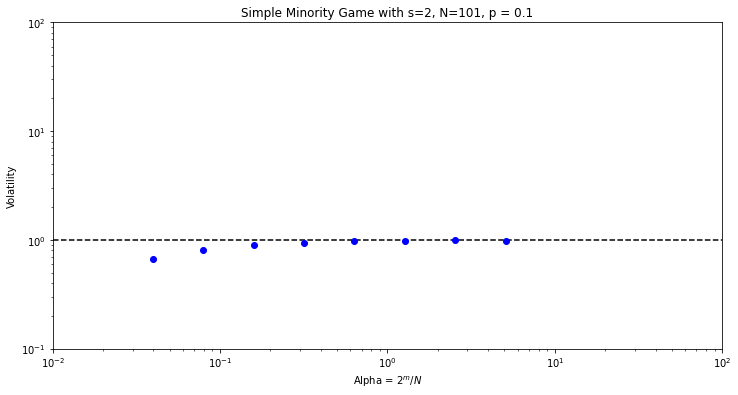

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.axhline(y=1, color="k", linestyle="--")
ax.plot(tot_alpha_01, tot_omega_01, 'bo')
ax.set_xlabel("Alpha = $2^m/N$")
ax.set_ylabel("Volatility")

plt.title("Simple Minority Game with s=2, N=101, p = 0.1")
plt.yscale('log')
plt.xscale('log')
plt.xlim([0.01,100])
plt.ylim([0.1,100])

plt.show()

### Minority Game with p = 0.01

In [7]:
from lib.minority_game import MinorityGame
from lib.agents.agent import Agent, StrategyUpdatingAgent
from lib.agents.factory import AgentFactory
from lib.strategies import AlwaysOneStrategy, DefaultStrategy, FiftyFiftyStrategy
from lib.memory import UniformMemoryGenerator
from lib.plots import default_plot

n_agents = 101 # check with David why it does not work if I do MinorityGame.n_agents
tot_omega_001 = []
tot_alpha_001 = []

for M in range (2,10):
    times, attendances, mean_A_t, vol_A_t = MinorityGame(
        n_agents=101,
        factory_dict={
            1: AgentFactory(
                StrategyUpdatingAgent,
                agent_kwargs=dict(
                    strategy_clss=[DefaultStrategy,DefaultStrategy],
                    strategy_update_rate=0.01
                ),
                memory_generator=UniformMemoryGenerator(M)
            ),
        }
    ).simulate_game(max_steps=50000)
    # in order to create the graph
    omega = np.average(vol_A_t)/n_agents
    alpha = 2**M/n_agents
    tot_omega_001.append(omega)
    tot_alpha_001.append(alpha)

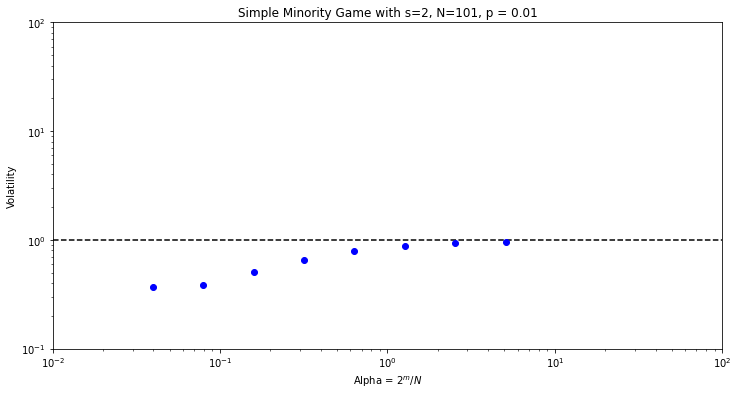

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.axhline(y=1, color="k", linestyle="--")
ax.plot(tot_alpha_001, tot_omega_001, 'bo')
ax.set_xlabel("Alpha = $2^m/N$")
ax.set_ylabel("Volatility")

plt.title("Simple Minority Game with s=2, N=101, p = 0.01")
plt.yscale('log')
plt.xscale('log')
plt.xlim([0.01,100])
plt.ylim([0.1,100])

plt.show()

### Simple Minority Game (p = 0)

In [9]:
from lib.minority_game import MinorityGame
from lib.agents.agent import Agent, StrategyUpdatingAgent
from lib.agents.factory import AgentFactory
from lib.strategies import AlwaysOneStrategy, DefaultStrategy, FiftyFiftyStrategy
from lib.memory import UniformMemoryGenerator
from lib.plots import default_plot

n_agents = 101 # check with David why it does not work if I do MinorityGame.n_agents
tot_omega_0 = []
tot_alpha_0 = []

for M in range (2,10):
    times, attendances, mean_A_t, vol_A_t = MinorityGame(
        n_agents=101,
        factory_dict={
            1: AgentFactory(
                Agent,
                agent_kwargs=dict(
                    strategy_clss=[DefaultStrategy,DefaultStrategy]
                ),
                memory_generator=UniformMemoryGenerator(M)
            ),
        }
    ).simulate_game(max_steps=50000)
    # in order to create the graph
    omega = np.average(vol_A_t)/n_agents
    alpha = 2**M/n_agents
    tot_omega_0.append(omega)
    tot_alpha_0.append(alpha)

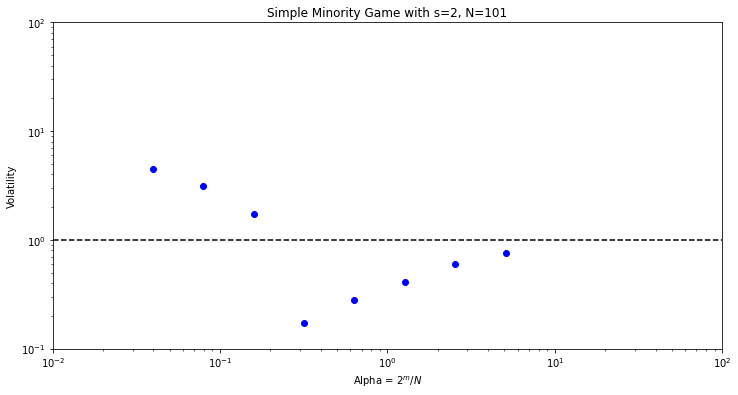

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.axhline(y=1, color="k", linestyle="--")
ax.plot(tot_alpha_0, tot_omega_0, 'bo')
ax.set_xlabel("Alpha = $2^m/N$")
ax.set_ylabel("Volatility")

plt.title("Simple Minority Game with s=2, N=101")
plt.yscale('log')
plt.xscale('log')
plt.xlim([0.01,100])
plt.ylim([0.1,100])

plt.show()

### Minority Game with two group, 80% of agent with p = 0 and 20% with p = 0.1

In [11]:
from lib.minority_game import MinorityGame
from lib.agents.agent import Agent, StrategyUpdatingAgent
from lib.agents.factory import AgentFactory
from lib.strategies import AlwaysOneStrategy, DefaultStrategy, FiftyFiftyStrategy
from lib.memory import UniformMemoryGenerator
from lib.plots import default_plot

n_agents = 101 # check with David why it does not work if I do MinorityGame.n_agents
tot_omega_80_20 = []
tot_alpha_80_20 = []

for M in range (2,10):
    times, attendances, mean_A_t, vol_A_t = MinorityGame(
        n_agents=101,
        factory_dict={
            0.8: AgentFactory(
                Agent,
                agent_kwargs=dict(strategy_clss=[DefaultStrategy, DefaultStrategy]),
                memory_generator=UniformMemoryGenerator(M)
            ),
            0.2: AgentFactory(
                StrategyUpdatingAgent,
                agent_kwargs=dict(
                    strategy_clss=[DefaultStrategy, DefaultStrategy],
                    strategy_update_rate=0.1
                ),
                memory_generator=UniformMemoryGenerator(M)
            ),
        }
    ).simulate_game(max_steps=50000)
    # in order to create the graph
    omega = np.average(vol_A_t)/n_agents
    alpha = 2**M/n_agents
    tot_omega_80_20.append(omega)
    tot_alpha_80_20.append(alpha)

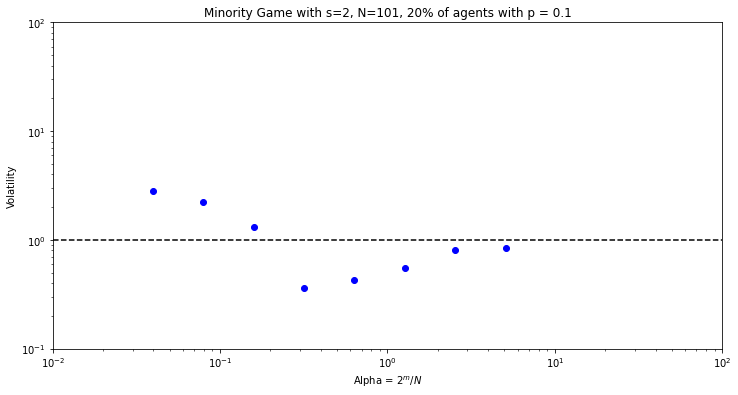

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.axhline(y=1, color="k", linestyle="--")
ax.plot(tot_alpha_80_20, tot_omega_80_20, 'bo')
ax.set_xlabel("Alpha = $2^m/N$")
ax.set_ylabel("Volatility")

plt.title("Minority Game with s=2, N=101, 20% of agents with p = 0.1")
plt.yscale('log')
plt.xscale('log')
plt.xlim([0.01,100])
plt.ylim([0.1,100])

plt.show()

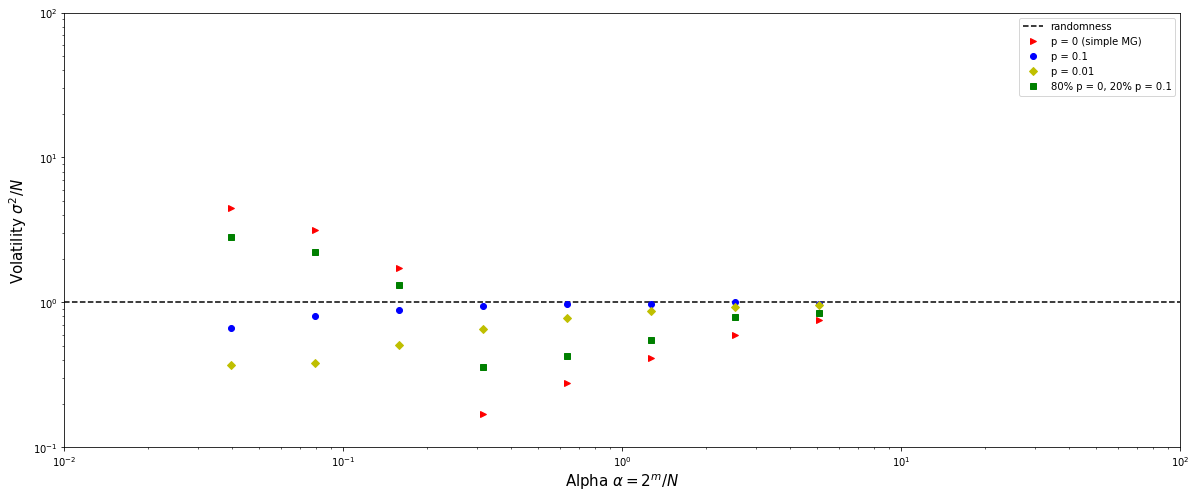

In [13]:
# everything in one graph

fig, ax = plt.subplots(figsize=(20, 8))

ax.axhline(y=1, color="k", linestyle="--") # vol = 1 -> randomness

ax.plot(tot_alpha_0, tot_omega_0, '>r')
ax.plot(tot_alpha_01, tot_omega_01, 'bo')
ax.plot(tot_alpha_001, tot_omega_001, 'Dy')
ax.plot(tot_alpha_80_20, tot_omega_80_20, 'sg')

ax.set_xlabel(r"Alpha $\alpha = 2^m/N$", fontsize=15)
ax.set_ylabel("Volatility $\sigma^2/N$", fontsize=15)

ax.legend(["randomness",
           "p = 0 (simple MG)",
           "p = 0.1",
           "p = 0.01", 
           "80% p = 0, 20% p = 0.1"])

#plt.title("Volatilty as a function of alpha (MG with s=2, N=101)")
plt.yscale('log')
plt.xscale('log')
plt.xlim([0.01,100])
plt.ylim([0.1,100])

plt.savefig("out/different_p.png", dpi = 300)
plt.show()